## Problem Statement:

### *Help a taxi operations company improve revenue and service efficiency by analyzing trip characteristics, peak hours, popular zones, and fare distribution*

In [1]:
# loading libraries numpy , pandas , matlab and seaborn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading taxis dataset
df = sns.load_dataset('taxis')

In [3]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [4]:
df.tail()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn
6432,2019-03-13 19:31:22,2019-03-13 19:48:02,1,3.85,15.0,3.36,0.0,20.16,green,credit card,Boerum Hill,Windsor Terrace,Brooklyn,Brooklyn


In [5]:
df.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

## Columns Explanation 

1. Pickup : This columns contains date and time information when the taxi is book or tripis started.
2. dropoff : This columns contains date and time information when the trip is done.
3. passengers : This column contain the information of number of passenger in the trip.
4. distance : Trip distance in miles.
5. fare : Charge for the trip.
6. tip  : Amount given by the passenger on successful trip.
7. tolls : Toll charge during the trip.
8. total : Tatal fare for the trip. ( fare + tip + toll)
9. color : color of taxis.
10. payment : Mode of payment done by customer.
11. pickup_zone : pickup location of the customer on the start of trip.
12. dropoff_zone : dropoff location of the customer on the end of trip.
13. pickup_borough : Borough of the pickup location.
14. dropof_borough : Borough of the drop location.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

Information of the Dataset:

This dataset contains 6433 total entries and 14 columns in which 
1. 1 integer column
2. 2 date and time columns
3. 5 float columns
4. 6 object columns

In [7]:
df.isnull().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

In [8]:
missing_summary = pd.DataFrame({
    'Missing_Values_count : ':df.isnull().sum(),
    'Missing_percentage : ': round(df.isnull().mean()*100 , 2)
})

print(missing_summary.sort_values(by='Missing_percentage : ',ascending = False).head())


                 Missing_Values_count :   Missing_percentage : 
dropoff_zone                          45                   0.70
dropoff_borough                       45                   0.70
payment                               44                   0.68
pickup_zone                           26                   0.40
pickup_borough                        26                   0.40


### In this dataset some of the columns contains the null values.

payment : 46 ( 0.7 %)

pickup_zone : 26 ( 0.7 %)

dropoff_zone : 45 ( 0.68 %)

pickup_borough : 26 ( 0.40 %)

dropoff_borough : 45 ( 0.68 %)

In [9]:
print("The total missing percentage by row wise  is :")
value = missing_summary['Missing_percentage : '].sum().sum()
print(f"{value:.2f} %")

The total missing percentage by row wise  is :
2.88 %


In [10]:
# rows * columns 
print("The total missing percentage  is :")
missing  = (df.isna().sum().sum() / df.size) * 100

print(f"{missing:.2f}%")

The total missing percentage  is :
0.21%


The total missing percentage is 0.21%, which is less than 1%.
Given the negligible proportion of missing values, these records can either be removed or imputed using appropriate statistical measures such as mean, median, or mode without introducing significant bias into the analysis.

### NUll Values by columns wise

In [11]:
df['payment'].value_counts()

payment
credit card    4577
cash           1812
Name: count, dtype: int64

In [12]:
df['payment'].value_counts(dropna=False)

# since in the payment mode credit card is strongly dominating.


payment
credit card    4577
cash           1812
NaN              44
Name: count, dtype: int64

In [13]:
payment_summary =pd.DataFrame({
    'Mode_count' : df['payment'].value_counts(dropna = False),
    'Mode_count_percentage':(df['payment'].value_counts(dropna=False, normalize =True) * 100)

})


In [14]:
print("The payment summary in percentages of different modes are:")
print(payment_summary['Mode_count_percentage'].round(2).astype(str) + '%')


The payment summary in percentages of different modes are:
payment
credit card    71.15%
cash           28.17%
NaN             0.68%
Name: Mode_count_percentage, dtype: object


Since the payment mode “credit card” is strongly dominant, accounting for 71.15% of transactions, followed by cash at 28.17%, and the proportion of missing values is only 0.68%, mode imputation is appropriate. Replacing missing payment values with “credit card” is unlikely to introduce significant bias into the analysis.

In [15]:
Mode_1 = df['payment'].mode()[0]
Mode_1

df['payment'].fillna(Mode_1,inplace = True)

In [16]:
df.isnull().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment             0
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

In [17]:
df['pickup_zone'].value_counts(dropna=False)

pickup_zone
Midtown Center                  230
Upper East Side South           211
Penn Station/Madison Sq West    210
Clinton East                    208
Midtown East                    198
                               ... 
Dyker Heights                     1
Queens Village                    1
Pelham Parkway                    1
Hunts Point                       1
Hillcrest/Pomonok                 1
Name: count, Length: 195, dtype: int64

In [18]:
df['dropoff_zone'].value_counts(dropna=False)

dropoff_zone
Upper East Side North        245
Murray Hill                  220
Midtown Center               215
Upper East Side South        177
Midtown East                 176
                            ... 
Bensonhurst East               1
Springfield Gardens South      1
East Flushing                  1
Brighton Beach                 1
Ozone Park                     1
Name: count, Length: 204, dtype: int64

The pickup_zone and dropoff_zone columns contain a wide variety of location categories, with no single zone clearly dominating. Since these are location-based features, mode imputation would be inappropriate as it could introduce geographic bias. Therefore, missing values are imputed using an explicit “Unknown” category.


Although Manhattan is the dominant borough, missing values in pickup and dropoff boroughs were imputed using an explicit “Unknown” category to prevent geographic bias in location-based analysis.

In [19]:
df['pickup_borough'].value_counts(dropna=False)

pickup_borough
Manhattan    5268
Queens        657
Brooklyn      383
Bronx          99
NaN            26
Name: count, dtype: int64

In [20]:
df['dropoff_borough'].value_counts(dropna=False)

dropoff_borough
Manhattan        5206
Queens            542
Brooklyn          501
Bronx             137
NaN                45
Staten Island       2
Name: count, dtype: int64

In [21]:
categorical_null_columns = [
    'pickup_zone','dropoff_zone', 'pickup_borough' , 'dropoff_borough'
]

In [22]:
df[categorical_null_columns] = df[categorical_null_columns].fillna('Unkown')

In [23]:
df.isnull().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

In [36]:
df['total'].sort_values(ascending = False).head(10)

5364    174.82
5648    169.70
622     166.00
4050    144.30
2231    136.56
3644    123.95
4815    123.36
4219    113.56
3500    107.16
4218    100.49
Name: total, dtype: float64

In [37]:
df['total'].sort_values(ascending = True).head(10)

1501    1.3
5697    3.3
1080    3.3
5624    3.3
6357    3.3
6355    3.3
3889    3.3
4550    3.3
3238    3.3
5546    3.3
Name: total, dtype: float64

In [43]:
df['trip_duration'] =( df['dropoff'] - df['pickup']).dt.total_seconds()/3600

In [51]:
print("Top 10 Trip Duration in second are :")
df['trip_duration'].head(10)

Top 10 Trip Duration in second are :


0    0.104167
1    0.118056
2    0.123333
3    0.431111
4    0.158889
5    0.168889
6    0.166111
7    0.184444
8    0.290000
9    0.138889
Name: trip_duration, dtype: float64

In [55]:
df['trip_duration_min'] =( df['dropoff'] - df['pickup']).dt.total_seconds()/60

In [61]:
print("Top  Trip Duration in minutes are :")
df['trip_duration_min'].sort_values(ascending = False).head(10)

Top  Trip Duration in minutes are :


6053    107.666667
5567     93.966667
5648     89.883333
5833     88.550000
4218     81.533333
1867     79.000000
1595     78.266667
5293     75.616667
785      75.366667
4738     75.216667
Name: trip_duration_min, dtype: float64

In [72]:
df['trip_duration_hours'] =( df['dropoff'] - df['pickup']).dt.total_seconds()/3600

In [73]:
df

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,trip_duration,trip_duration_min,trip_duration_hours
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,0.104167,6.250000,0.104167
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,0.118056,7.083333,0.118056
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,0.123333,7.400000,0.123333
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,0.431111,25.866667,0.431111
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,0.158889,9.533333,0.158889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan,0.059444,3.566667,0.059444
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx,0.939722,56.383333,0.939722
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn,0.318611,19.116667,0.318611
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn,0.084444,5.066667,0.084444


In [82]:
print("The pickup hours are :")

hours = df['pickup'].dt.hour
print(f"{hours} in hours")


The pickup hours are :
0       20
1       16
2       17
3        1
4       13
        ..
6428     9
6429    17
6430    22
6431    10
6432    19
Name: pickup, Length: 6433, dtype: int32 in hours


In [87]:
hours.value_counts().sort_values(ascending = False).sort_index()

pickup
0     205
1     110
2     101
3      67
4      57
5      51
6     142
7     221
8     313
9     319
10    325
11    295
12    334
13    316
14    360
15    330
16    336
17    388
18    417
19    406
20    368
21    355
22    321
23    296
Name: count, dtype: int64

Taxi demand is strongly time-dependent, with clear peaks during morning and evening hours.
The highest number of trips occurs in the evening, indicating increased travel during post-work hours.

Trip demand is relatively low during the early morning hours, particularly between 2 AM and 5 AM. From 6 AM onward, trips increase sharply, reaching a peak around 10 AM, which corresponds to morning commute hours.

Demand remains steady throughout the afternoon and late evening, gradually declining after 11 PM.
The maximum number of trips is observed at 6 PM, aligning with evening office return and leisure travel.

In [99]:
df['Nu_of_days'] = df['pickup'].dt.day


In [101]:
df['Nu_of_days'].value_counts()

Nu_of_days
14    260
6     257
13    244
1     241
8     235
20    233
27    232
22    229
5     228
21    221
16    220
12    218
7     218
30    215
23    209
11    209
29    209
28    206
9     204
15    201
19    201
2     198
31    187
10    185
17    178
26    178
18    173
4     171
3     169
25    155
24    149
Name: count, dtype: int64

The distribution of taxi trips across days of the month shows a relatively uniform pattern, with minor fluctuations. The highest number of trips was recorded on the 14th day, while the lowest occurred on the 24th

In [102]:
df['pickup_day'] = df['pickup'].dt.day_name()

In [103]:
df['pickup_day'].value_counts()

pickup_day
Friday       1115
Saturday     1046
Wednesday     966
Thursday      905
Sunday        868
Tuesday       825
Monday        708
Name: count, dtype: int64

Friday and Saturday have the highest taxi demand, while Monday records the lowest. Demand increases steadily through the week and remains strong over the weekend.

In [105]:
df['is_weekend'] = df['pickup'].dt.dayofweek.isin([5, 6])

In [106]:
df['is_weekend'].value_counts()

is_weekend
False    4519
True     1914
Name: count, dtype: int64

In [113]:
df['is_weekend'].value_counts(normalize = True) * 100

is_weekend
False    70.247163
True     29.752837
Name: proportion, dtype: float64

In [111]:
df['pickup_month'] = df['pickup'].dt.month_name()

In [112]:
df['pickup_month'].value_counts()

pickup_month
March       6432
February       1
Name: count, dtype: int64

The dataset primarily contains trips from the month of March, with only a single observation from February. Due to the extreme imbalance, month-wise comparisons and seasonal analysis are not meaningful for this dataset.

Approximately 70% of taxi trips occur on weekdays, with the remaining 30% on weekends.
While weekday trips dominate overall taxi usage, weekend demand remains significant. This suggests opportunities for dynamic pricing, targeted promotions, and optimized driver availability during weekends.

## Univariant and Bivariant Analysis

In [114]:
df.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough', 'trip_duration',
       'trip_duration_min', 'trip_duration_hours', 'pickup_day', 'Nu_of_days',
       'is_weekend', 'pickup_month'],
      dtype='object')

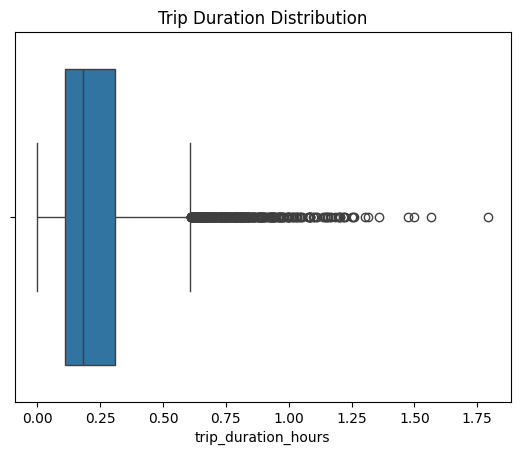

In [120]:
sns.boxplot(x=df['trip_duration_hours'])
plt.title('Trip Duration Distribution')
plt.show()

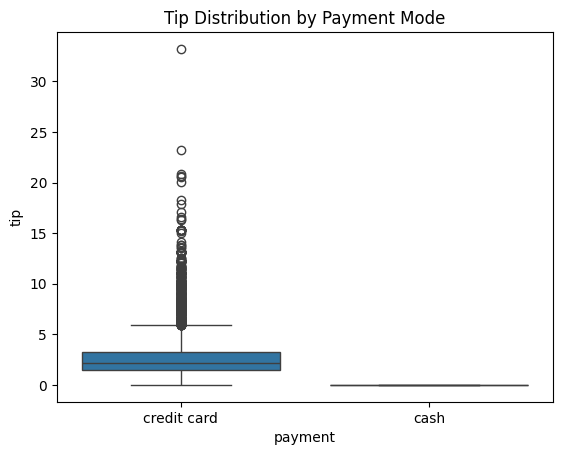

In [121]:
sns.boxplot(x='payment', y='tip', data=df)
plt.title('Tip Distribution by Payment Mode')
plt.show()


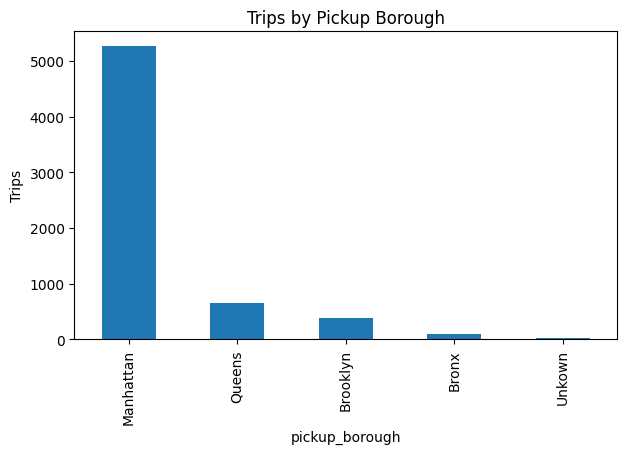

In [122]:
df['pickup_borough'].value_counts().plot(
    kind='bar', figsize=(7,4)
)
plt.title('Trips by Pickup Borough')
plt.ylabel('Trips')
plt.show()


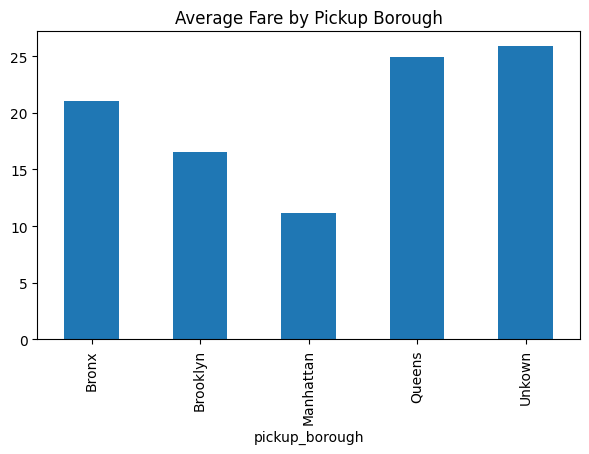

In [124]:
df.groupby('pickup_borough')['fare'].mean().plot(
    kind='bar', figsize=(7,4)
)
plt.title('Average Fare by Pickup Borough')
plt.show()


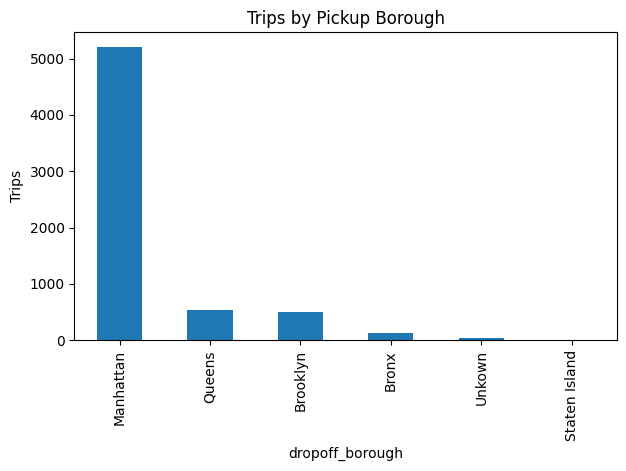

In [123]:
df['dropoff_borough'].value_counts().plot(
    kind='bar', figsize=(7,4)
)
plt.title('Trips by Pickup Borough')
plt.ylabel('Trips')
plt.show()


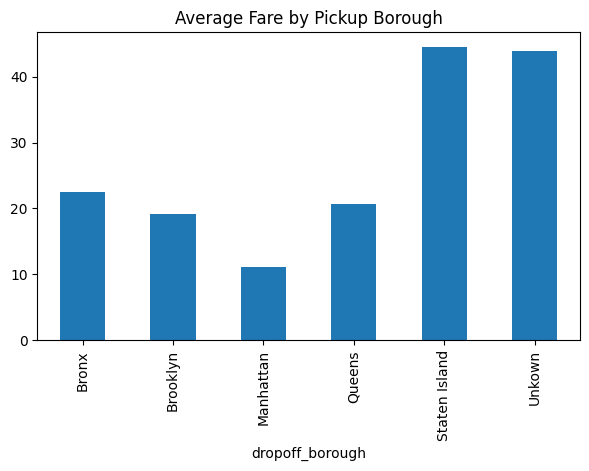

In [125]:
df.groupby('dropoff_borough')['fare'].mean().plot(
    kind='bar', figsize=(7,4)
)
plt.title('Average Fare by Pickup Borough')
plt.show()


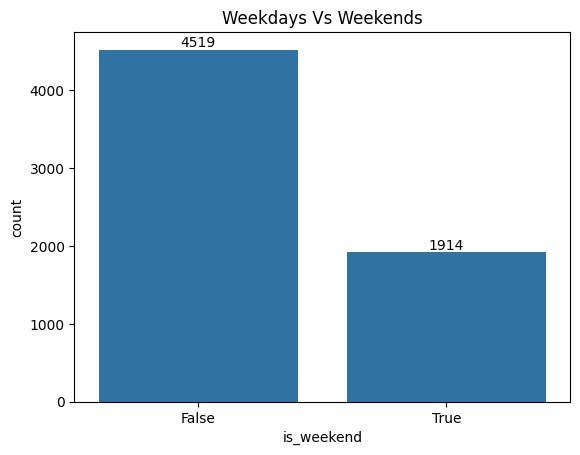

In [127]:
ax = sns.countplot(x = 'is_weekend' , data = df)
plt.title("Weekdays Vs Weekends")
for i in ax.containers:
    ax.bar_label(i)

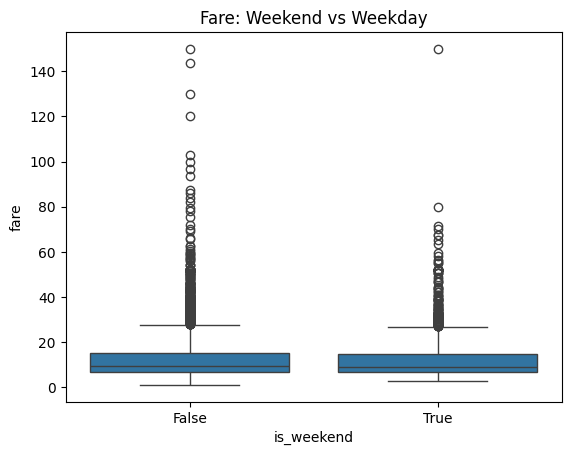

In [128]:
sns.boxplot(x='is_weekend', y='fare', data=df)
plt.title('Fare: Weekend vs Weekday')
plt.show()

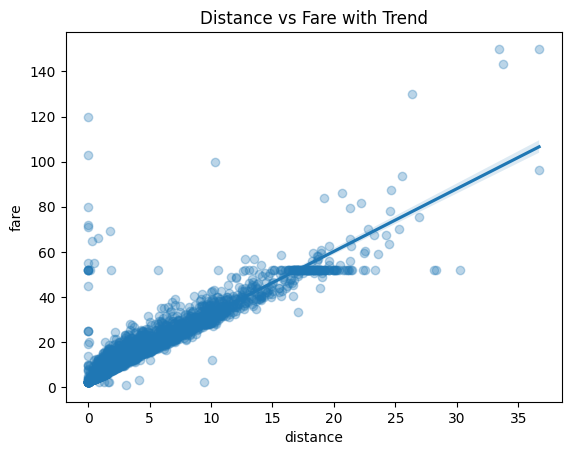

In [129]:
sns.regplot(
    x='distance', y='fare',
    data=df, scatter_kws={'alpha':0.3}
)
plt.title('Distance vs Fare with Trend')
plt.show()


In [132]:
df.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough', 'trip_duration',
       'trip_duration_min', 'trip_duration_hours', 'pickup_day', 'Nu_of_days',
       'is_weekend', 'pickup_month'],
      dtype='object')

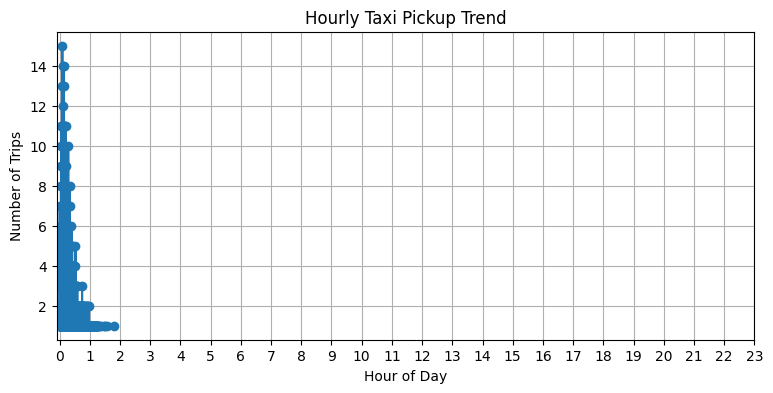

In [133]:


hourly_pickups = df['trip_duration_hours'].value_counts().sort_index()

plt.figure(figsize=(9,4))
plt.plot(hourly_pickups.index, hourly_pickups.values, marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.title('Hourly Taxi Pickup Trend')
plt.xticks(range(0,24))
plt.grid(True)
plt.show()


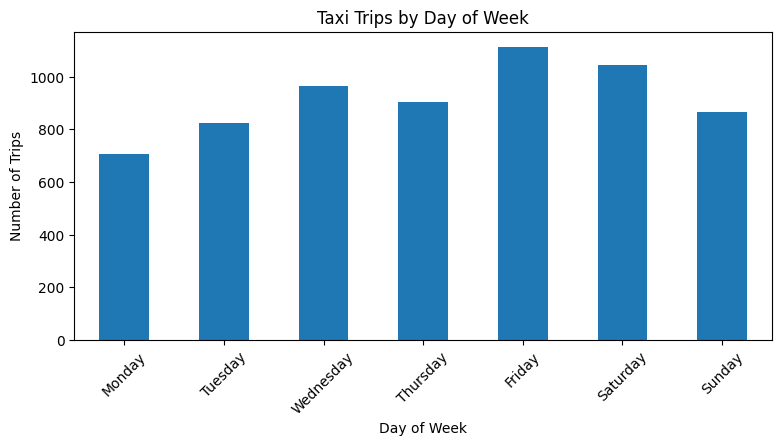

In [135]:
day_order = [
    'Monday','Tuesday','Wednesday',
    'Thursday','Friday','Saturday','Sunday'
]

daywise_pickups = df['pickup_day'].value_counts().reindex(day_order)

plt.figure(figsize=(9,4))
daywise_pickups.plot(kind='bar')
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.title('Taxi Trips by Day of Week')
plt.xticks(rotation=45)
plt.show()


# Conclusion :

The exploratory data analysis reveals that taxi demand is highly influenced by temporal factors, particularly time of day and day of week. Approximately 70% of trips occur on weekdays, indicating that taxi usage is largely driven by commuting behavior, while the remaining 30% of trips on weekends highlights the continued importance of leisure and social travel. This balance presents opportunities for dynamic pricing, targeted promotions, and optimized driver deployment, especially during weekends.

Demand varies significantly across the week, with Friday and Saturday recording the highest number of trips, while Monday shows the lowest activity. Trip volume gradually increases as the week progresses and remains strong through the weekend. Analysis of trips by day of month shows a relatively uniform distribution, with only minor fluctuations, suggesting that taxi demand is not strongly dependent on specific calendar dates.

Hourly analysis confirms that taxi demand is strongly time-dependent, exhibiting clear morning and evening peaks. Trip volume is lowest during early morning hours (2–5 AM), increases sharply from 6 AM, peaks around 10 AM during morning commute hours, and reaches its maximum at 6 PM, corresponding to evening office return and leisure travel. Demand remains steady throughout the afternoon and late evening before gradually declining after 11 PM.

From a data quality perspective, the dataset contains a very small proportion of missing values (0.21%), which is statistically negligible. Missing values in location-based features such as pickup_zone, dropoff_zone, pickup_borough, and dropoff_borough were handled using an explicit “Unknown” category to avoid introducing geographic bias. Despite Manhattan being the dominant borough, this approach preserves the integrity of spatial analysis.

For the payment feature, credit card transactions dominate (71.15%), followed by cash (28.17%), and the proportion of missing values is minimal (0.68%). Therefore, mode imputation using “credit card” is appropriate and unlikely to introduce bias.

Finally, the dataset is almost entirely concentrated in the month of March, with only a single observation from February. Due to this extreme imbalance, month-wise and seasonal analyses are not meaningful and were appropriately excluded from interpretation.


In [136]:
df.to_csv('taxi_data.csv', index=False)
